# PyTorch Learning
KurwAI | Cheslaff | 🎄<br>
<img src="https://images.emojiterra.com/google/noto-emoji/unicode-16.0/color/1024px/1f9ab.png" width=5%>
<img src="https://em-content.zobj.net/source/apple/391/red-heart_2764-fe0f.png" width=5%>
<img src="https://static-00.iconduck.com/assets.00/pytorch-icon-1694x2048-jgwjy3ne.png" width=5%>

## Computer Vision libraries in PyTorch

**torchvision** - special library including datasets, models, transformations for cv problems.


In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

torch.__version__, torchvision.__version__

('2.4.1+cu121', '0.19.1+cu121')

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
# Training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),  # from PIL to tensor
    target_transform=None  # We don't need to transform labels
)

# Testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 14264554.72it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 209780.59it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3912416.55it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 12310306.15it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
image, label = train_data[0]
# PyTorch accepts channels first by default, but channels last are also supported
# furthermore, channels last perform better
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [5]:
class_names = train_data.classes
class_names  # multiclass classification

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

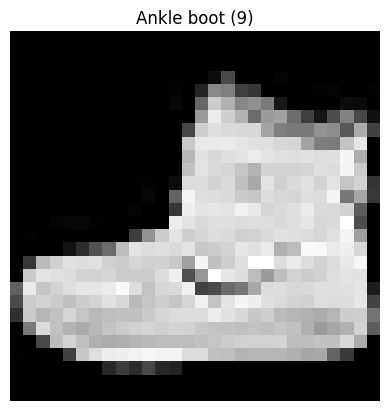

In [6]:
plt.title(f"{class_names[label]} ({label})")
plt.axis("off")
plt.imshow(image.squeeze(), cmap="gray");

## DataLoader

In [7]:
from torch.utils.data import DataLoader

In [8]:
# DataLoader splits data to minibatches
# DataLoaders are iterable
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

test_dataloader = DataLoader(test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)

In [9]:
print(f"Train: {len(train_dataloader)} x {BATCH_SIZE}")
print(f"Test: {len(test_dataloader)} x {BATCH_SIZE}")

Train: 1875 x 32
Test: 313 x 32


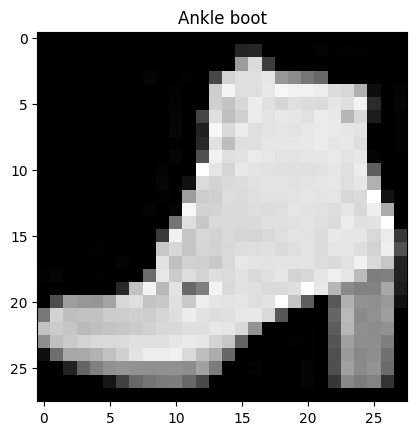

In [10]:
for image_batch, label_batch in train_dataloader:
    image = image_batch[0][0]
    label = label_batch[0].item()
    plt.title(class_names[label])
    plt.imshow(image.squeeze(), cmap="gray")
    break

## Simple BaseLine Model

In [11]:
class DummyModel(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [12]:
torch.manual_seed(42)

dummy_model = DummyModel(input_shape=784, hidden_units=20, output_shape=len(class_names))
dummy_model.to("cpu")

DummyModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [13]:
def accuracy_fn(y_true, y_pred):
    return 1 / len(y_true) * torch.eq(y_true, y_pred).sum().item()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(dummy_model.parameters(), lr=0.1)

In [14]:
torch.manual_seed(42)

epochs=3

for epoch in range(epochs):
    train_loss, train_acc = 0, 0
    for X, y in train_dataloader:
        dummy_model.train()
        y_pred = dummy_model(X)
        loss = loss_fn(y_pred, y.type(torch.LongTensor))
        train_loss += loss
        train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    
    test_loss, test_acc = 0, 0
    dummy_model.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = dummy_model(X)
            test_loss += loss_fn(test_pred, y.type(torch.LongTensor))
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f"Epoch: {epoch} | Train Loss: {train_loss} | Train Acc: {train_acc} | Test Loss: {test_loss} | Test Acc: {test_acc}")

Epoch: 0 | Train Loss: 0.5824316143989563 | Train Acc: 0.7936 | Test Loss: 0.5038698315620422 | Test Acc: 0.8229832268370607
Epoch: 1 | Train Loss: 0.4747304320335388 | Train Acc: 0.83365 | Test Loss: 0.4823354482650757 | Test Acc: 0.830870607028754
Epoch: 2 | Train Loss: 0.4542078673839569 | Train Acc: 0.8407333333333333 | Test Loss: 0.4772161543369293 | Test Acc: 0.8343650159744409


In [66]:
torch.manual_seed(42)
def eval_model(model, data_loader, loss_fn, accuracy_fn, device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)
    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc
    }

model_results = eval_model(dummy_model, test_dataloader, loss_fn, accuracy_fn, "cpu")
model_results

{'model_name': 'DummyModel',
 'model_loss': 0.4772161543369293,
 'model_acc': 0.8343650159744409}

## Dummy Model with non-linearity

In [57]:
class DummyV2(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.dumbo = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_shape),
            nn.ReLU()
        )
    def forward(self, X):
        return self.dumbo(X)

In [58]:
dumdum = DummyV2(784, 20, len(class_names)).to(device)
dumdum

DummyV2(
  (dumbo): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=20, bias=True)
    (2): ReLU()
    (3): Linear(in_features=20, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [59]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=dumdum.parameters(), lr=0.1)

In [60]:
def train_step(model,
              data_loader,
              loss_fn,
              accuracy_fn,
              optimizer,
              device=device):
    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()

    for X, y in data_loader:
        X, y = X.to(device), y.to(device)

        logs_pred = model(X)
        y_pred = logs_pred.argmax(dim=1)
        loss = loss_fn(logs_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y, y_pred)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.3f} | Train Accuracy: {train_acc:.3f}")

In [61]:
def test_step(model,
             data_loader,
             loss_fn,
             accuracy_fn,
             device=device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            logs_test = model(X)
            test_pred = logs_test.argmax(dim=1)
            test_loss += loss_fn(logs_test, y)
            test_acc += accuracy_fn(y, test_pred)

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
    print(f"Test loss: {test_loss} | Test Accuracy: {test_acc}")

In [62]:
epochs = 3
torch.manual_seed(42)

for epoch in range(epochs):
    print(f"Epoch: {epoch+1}\n ------------")
    train_step(
        dumdum,
        train_dataloader,
        loss_fn,
        accuracy_fn,
        optimizer,
        device
    )
    test_step(
        dumdum,
        test_dataloader,
        loss_fn,
        accuracy_fn
    )

Epoch: 1
 ------------
Train loss: 0.796 | Train Accuracy: 0.735
Test loss: 0.6855658888816833 | Test Accuracy: 0.7662739616613419
Epoch: 2
 ------------
Train loss: 0.644 | Train Accuracy: 0.779
Test loss: 0.659324586391449 | Test Accuracy: 0.7750599041533547
Epoch: 3
 ------------
Train loss: 0.439 | Train Accuracy: 0.844
Test loss: 0.4338240921497345 | Test Accuracy: 0.8432507987220448


In [67]:
eval_model(dumdum, test_dataloader, loss_fn, accuracy_fn, device)

{'model_name': 'DummyV2',
 'model_loss': 0.4338240921497345,
 'model_acc': 0.8432507987220448}

## Convolutional Neural Network

In [74]:
class ConvModel(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1
                     ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1
                     ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)  # (28, 28) -> (14, 14)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            # (14, 14) -> (7, 7)
            nn.MaxPool2d(kernel_size=2)  # stride = kernel_size if not specified
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(7 * 7 * hidden_units, output_shape)
        )

    def forward(self, X):
        a = self.block_1(X)
        a = self.block_2(a)
        a = self.classifier(a)
        return a

In [75]:
torch.manual_seed(42)
convy = ConvModel(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)
convy

ConvModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [76]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(convy.parameters(), lr=0.1)

In [77]:
epochs = 3
torch.manual_seed(42)

for epoch in range(epochs):
    print(f"Epoch: {epoch+1} \n-----------")
    train_step(convy,
              train_dataloader,
              loss_fn,
              accuracy_fn,
              optimizer)
    test_step(convy,
              test_dataloader,
              loss_fn,
              accuracy_fn)

Epoch: 1 
-----------
Train loss: 0.590 | Train Accuracy: 0.785
Test loss: 0.40345123410224915 | Test Accuracy: 0.858526357827476
Epoch: 2 
-----------
Train loss: 0.365 | Train Accuracy: 0.867
Test loss: 0.35912057757377625 | Test Accuracy: 0.8714057507987221
Epoch: 3 
-----------
Train loss: 0.330 | Train Accuracy: 0.880
Test loss: 0.33661332726478577 | Test Accuracy: 0.8773961661341853


In [79]:
eval_model(convy, test_dataloader, loss_fn, accuracy_fn, device)  # GOAT

{'model_name': 'ConvModel',
 'model_loss': 0.33661332726478577,
 'model_acc': 0.8773961661341853}

In [87]:
def make_predictions(model, data, device):
    pred_probas = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probas.append(pred_prob.cpu())
    return torch.stack(pred_probas)

In [88]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

In [90]:
pred_probs = make_predictions(convy, test_samples, device)
pred_classes = pred_probs.argmax(dim=1)

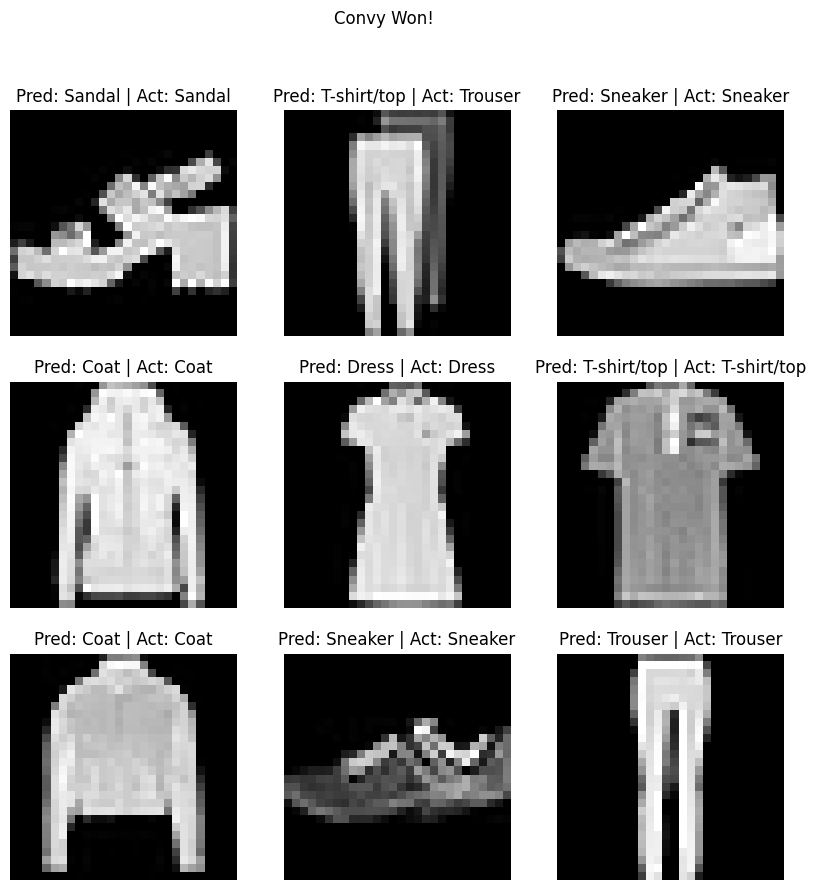

In [96]:
plt.figure(figsize=(10, 10))
plt.suptitle("Convy Won!")
for i in range(len(test_labels)):
    plt.subplot(3, 3, i+1)
    plt.axis("off")
    plt.title(f"Pred: {class_names[pred_classes[i]]} | Act: {class_names[test_labels[i]]}")
    plt.imshow(test_samples[i].squeeze(), cmap="gray");

**PyTorch Dummy Path 2024-2025**<br>
<img src="https://images.emojiterra.com/google/noto-emoji/unicode-16.0/color/1024px/1f9ab.png" width=5%>
<img src="https://em-content.zobj.net/source/apple/391/red-heart_2764-fe0f.png" width=5%>
<img src="https://static-00.iconduck.com/assets.00/pytorch-icon-1694x2048-jgwjy3ne.png" width=5%><br>
MIT License, no doubt